# Predicting continuous values using Deep_Auto_ViML

Utilizing the chennai house prices dataset from [Kaggle](https://www.kaggle.com/amaanafif/chennai-house-price) to predict housing prices based on variables like "location", "builder", "age of the property", "number of bedrooms", "number of bathrooms"

Target - Price of the home

In [ ]:
pip install deep_autoviml --upgrade

In [1]:
# use pandas numpy as usual
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
#from split_data_n_ways import split_data_n_ways, fast_classify_features
from sklearn.preprocessing import LabelEncoder
LLB = LabelEncoder()
from deep_autoviml import deep_autoviml as deepauto


Imported deep_auto_viml. version=0.0.69
from deep_autoviml import deep_autoviml as deepauto
-------------------
model, cat_vocab_dict = deepauto.fit(train, target, keras_model_type="fast",
		project_name="deep_autoviml", keras_options=keras_options,  
		model_options=model_options, save_model_flag=True, use_my_model='',
		model_use_case='', verbose=0)

predictions = deepauto.predict(model, project_name, test_dataset=test,
                                 keras_model_type=keras_model_type, 
                                 cat_vocab_dict=cat_vocab_dict)
                                


## Downloading the [chennai house prices dataset](https://www.kaggle.com/amaanafif/chennai-house-price) from kaggle

In [ ]:
from google.colab import files

files.upload()

In [5]:
mkdir ~/.kaggle

In [6]:
cp kaggle.json ~/.kaggle

In [8]:
!chmod 600 ~/.kaggle/kaggle.json

In [27]:
!kaggle datasets download -d amaanafif/chennai-house-price

  0% 0.00/21.0k [00:00<?, ?B/s]
100% 21.0k/21.0k [00:00<00:00, 16.5MB/s]


In [28]:
!unzip chennai-house-price.zip -d chennai-house-price

Archive:  chennai-house-price.zip
  inflating: chennai-house-price/clean_data.csv  


## Importing the dataset

In [29]:
datapath = '/content/chennai-house-price/'
filename = 'clean_data.csv'
#filename = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
sep = ','
train_datafile = datapath+filename
#target = ['target_1','target_2','target_3']
target = 'price'

In [30]:
# load dataset
train = pd.read_csv(train_datafile, header=0, sep=sep)
print(train.shape)
train.head(1)

(2620, 8)


,price,area,status,bhk,bathroom,age,location,builder
0,37.49,872,Ready to move,2,NaN,1.0,Sembakkam,MP Developers


In [31]:
train, test = train_test_split(train) #splitting the dataset into train and test 

In [32]:
test.head(1)

,price,area,status,bhk,bathroom,age,location,builder
265,72.85,1301,Under Construction,3,NaN,0.0,Pammal,Asset Tree Homes


In [36]:
test.to_csv("/content/music-data/music_genre_test.csv") #saving the test as a csv to test the model later

In [33]:
keras_model_type = "auto" ## always try "fast" first, then "fast1", "fast2", "auto" in that order
project_name = "music_genre"
model_options = {'nlp_char_limit':50, 'cat_feat_cross_flag':"",
                 'max_trials': 5, "tuner": "storm"}
keras_options = {"patience":10, 'class_weight': True, 'early_stopping': True, 
                 'lr_scheduler': '', "optimizer": 'RMS'}

    Only CPU found on this device
Setting CPU strategy using 1 devices
Using following keras_options given as input:
    patience : 10
    optimizer : RMS
    class_weight : True
    lr_scheduler : 
    early_stopping : True
Using following model_options given as input:
    cat_feat_cross_flag : 
    nlp_char_limit : 50
    max_trials : 5
    tuner : storm
Max Trials : 5. Please increase max_trials if you want to better accuracy...

#################################################################################
###########     L O A D I N G    D A T A    I N T O   TF.DATA.DATASET H E R E  #
#################################################################################
        
CSV file being loaded into tf.data.Dataset
    Since number of rows in file <= 10000 maxrows, loading entire file into pandas for EDA
Alert! Modified column names to satisfy rules for column names in Tensorflow...
    Model type is Regression and Single_Label problem
Loaded a small data sample of size = (262

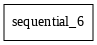


#################################################################################
###########     T R A I N I N G    K E R A S   M O D E L   H E R E      #########
#################################################################################
    
Building and training an automatic model using storm Tuner...
    Class weights: {}
    original datasize = 2621, initial batchsize = 32
    Early stopping : True
    recommended steps per epoch = 40
    default initializer = lecun_normal, default activation = selu
    Onecycle steps = 4100
    number of classes = 1, output_activation = linear
    loss function: mae
    steps_per_epoch = 40, number epochs = 100
    val mode = min, val monitor = val_rmse, patience = 10
Tensorboard log directory can be found at: deep_autoviml/mylogs
    chosen keras LR scheduler = default

Splitting train into 80+20 percent: train and validation data
    Splitting validation 20 into 10+10 percent: valid and heldout data
Single-Label: Heldout data shape: (28

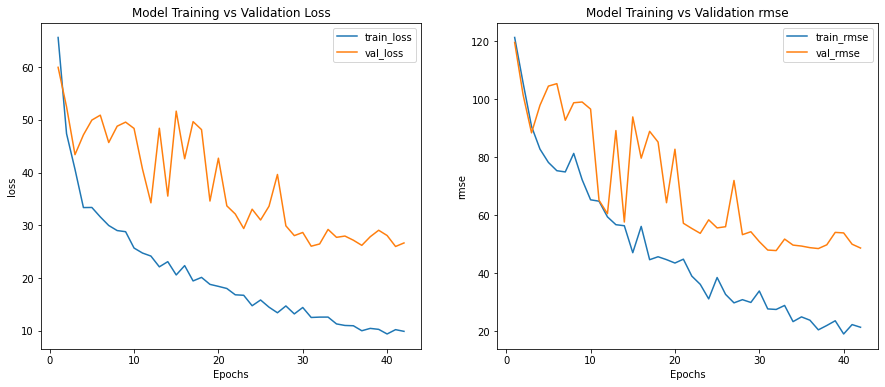

Time taken to train model (in mins) = 1
    Stopped epoch = 32
Held out data actuals shape: (288,)
    samples from label: [37.4900016784668, 93.54000091552734, 151.0, 49.0, 42.279998779296875, 188.0, 38.0, 72.98999786376953, 125.0, 24.559999465942383]

Held out predictions shape:(288,)
    Sample predictions: [ 48.26  102.391 125.913  46.352  39.315 165.517  52.298  69.042 152.817
  28.149]

###########################################################
         Held-out test data set Results:
Regression Plots completed in 0.042 seconds
    MAE = 26.4688
    MAPE = 25%
    RMSE = 47.8511
    MAE as % std dev of Actuals = 22.4%
    R-Squared (% ) = 84%
    Normalized RMSE (% of Std Dev of Actuals) = 40%
Saved predictions in music_genre/music_genre_predictions.csv file

Finally, training on full train dataset. This will take time...
    best learning rate = 0.0027973522
    set learning rate using best model: 0.0027973522
    max epochs for training = 32

Model not being saved since save_m

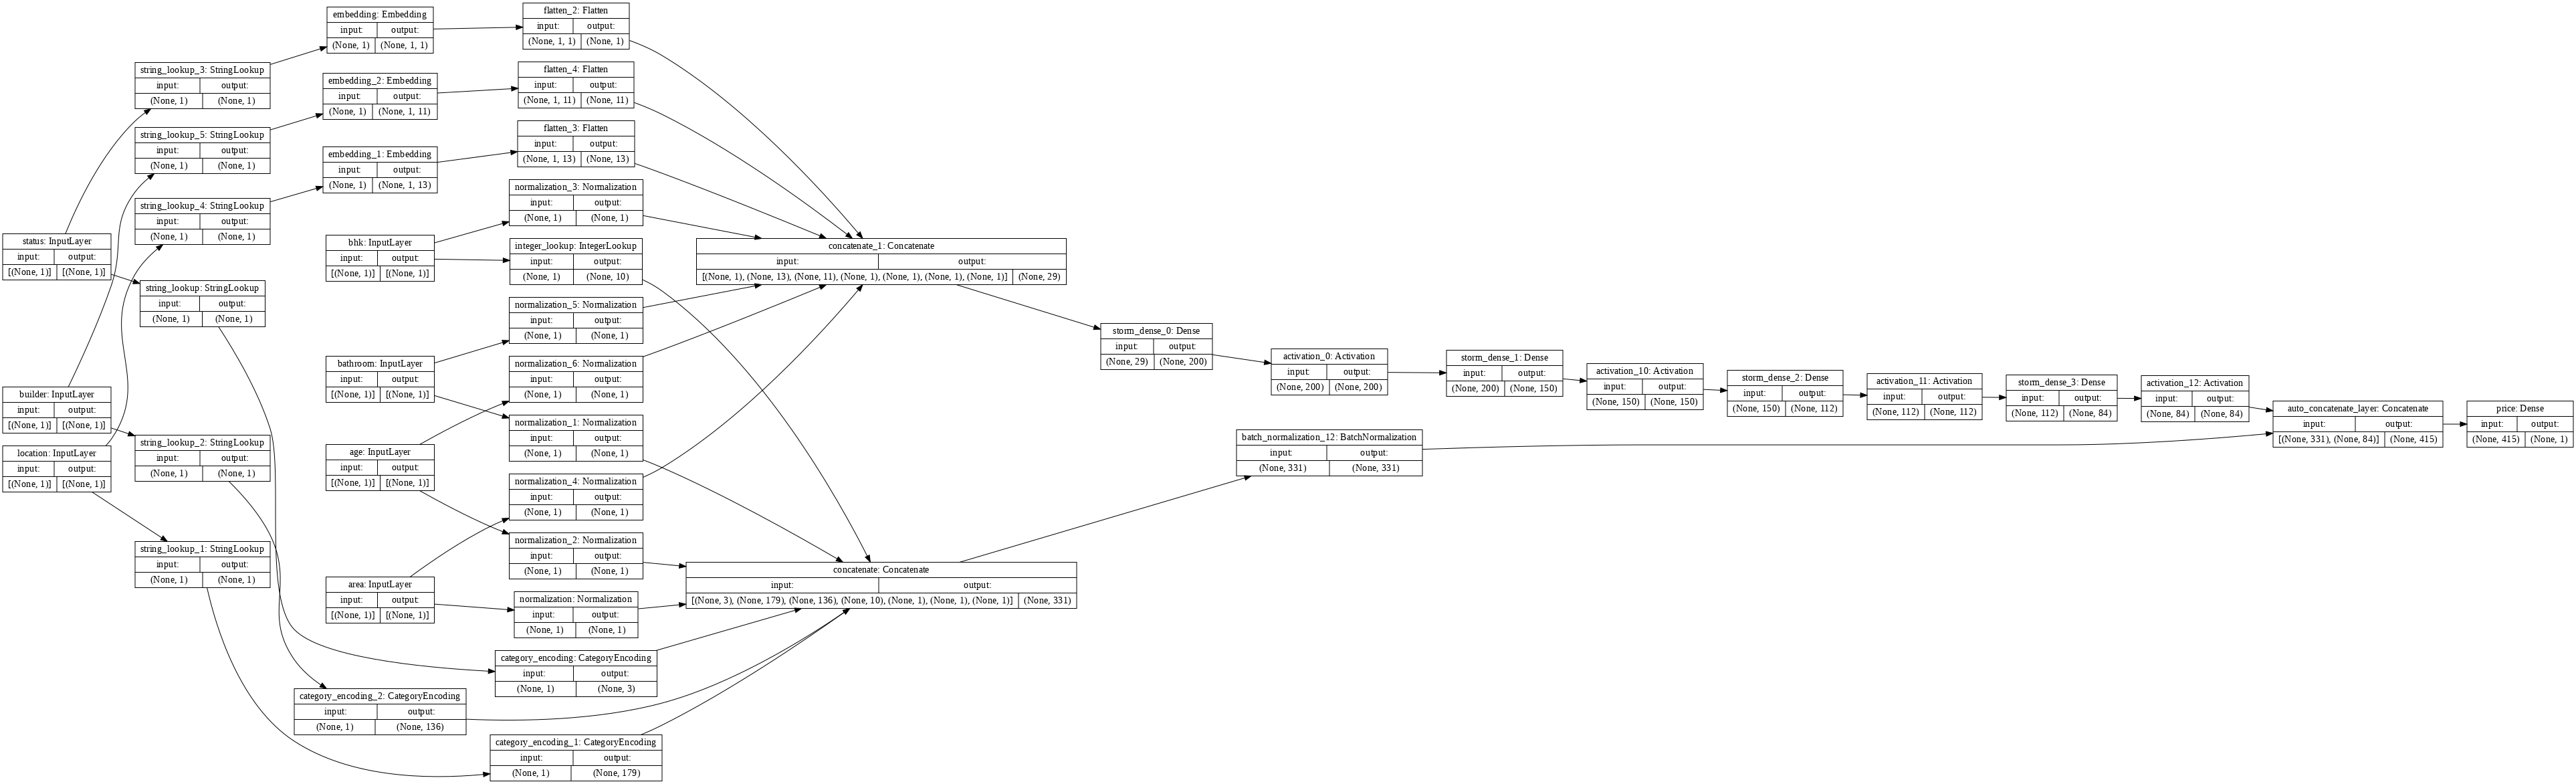

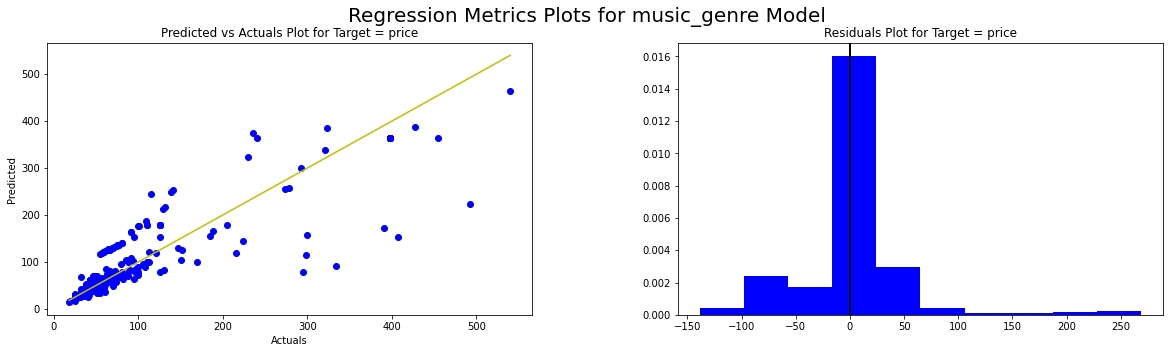

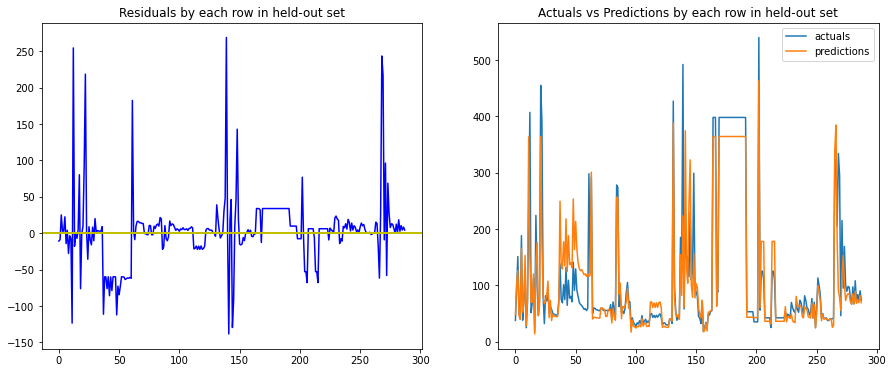

In [34]:
model, cat_vocab_dict = deepauto.fit(train_datafile, target, keras_model_type=keras_model_type,
		project_name=project_name, keras_options=keras_options, model_options=model_options, 
		save_model_flag=False, use_my_model='', verbose=1)

## Testing and evaluating the model using r2_score

In [47]:
from deep_autoviml.utilities.utilities import plot_classification_results, print_regression_model_stats
from sklearn.metrics import classification_report, confusion_matrix, r2_score
#from autoviml.Auto_ViML import plot_regression_scatters

In [37]:
url = "/content/music-data/music_genre_test.csv"

In [38]:
predictions = deepauto.predict(model, project_name, test_dataset=url,
                                 keras_model_type=keras_model_type, 
                                 cat_vocab_dict=cat_vocab_dict)


Loading deep_autoviml model from <tensorflow.python.keras.engine.functional.Functional object at 0x7ff7740fe1d0> folder. This will take time...

Using <tensorflow.python.keras.engine.functional.Functional object at 0x7ff7740fe1d0> model provided as input...
Time taken to load saved model = 0 seconds
Loaded test data size: 655
Alert! Modified column names to satisfy rules for column names in Tensorflow...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    9 Predictors classified...
    possible latitude columns in dataset: []
        after further analysis, no latitude columns found
    possible longitude columns in dataset: []
        after further analysis, no longitude columns found
        1 variable(s) to be removed since they were ID or low-information variables
Distribution of string columns in datatset:
    number of binary = 1, cats = 0, high cats = 0, very high cats = 2
Distribution of integer columns in data

In [41]:
y_preds = predictions[0]
y_preds[:10]

array([ 72.992,  65.031, 219.674,  23.145, 108.713,  23.123,  79.961,
        84.683,  63.738,  63.831], dtype=float32)

In [42]:
y_test = test[target].values
y_test[:10]

array([ 72.85,  69.33, 181.  ,  31.14,  86.9 ,  31.07,  82.87, 100.  ,
        68.38,  58.48])

In [49]:
print('R2 score = %0.1f%%' %(100*r2_score(y_test, y_preds)))

R2 score = 97.7%
